<a href="https://colab.research.google.com/github/DannielM/Machine-Learning/blob/main/Caso_2_da_4intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Data Science* - **4 Intelligence**

## **Caso 2** - Análise Exploratória de Dados de Importação e Exportação do Brasil

In [44]:
# Ciência de Dados é Vida 
%%html
<marquee style='width: 60%; color: Red;'><b> Partiu Trabalhar!</b></marquee>

## 1° Importando as Bibliotecas

In [ ]:
!pip install pmdarima

In [3]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot 
import numpy as np
import seaborn as sns
import requests
import folium
from plotly.offline import iplot
import scipy.stats as st 
from string import ascii_letters
import random
import time
import warnings
import statsmodels.api as sm 
import pmdarima as pm

#Informar o matplotlib inline sobre os gráficos
%matplotlib inline

# Importando Algumas Funções
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from collections import Counter
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
random.seed(0)
warnings.filterwarnings('ignore')

## 2° Entendendo o Problema a ser Resolvido

- Nesse caso prático, nós precisamos fazer um estudo da base de dados disponibilizada, onde contém os dados do **Comexstat** , que é basicamente a fonte oficial de dados das exportações e importações brasileiras, mantida pelo governo.

- O estudo consiste em fazermos uma nálise exploratória dos dados, a fim de mostrarmos a evolução das exportações totais, mensais e anuais do Brasil, para que assim possamos realizar manipulaçõe, modelagem e previsões futuras dos produtos importados e exportados pelo Brasil. 

**Fonte de Dados**

Usaremos a base de dados "**data_comexstat.csv**"   e   "**covariates.xlsx**"  dsiponibilizado pela 4intelligence para esse estudo.

- O conjunto de dados contém todos os rastreamentos de importações e exportações mensais de uma gama de produtos (*soja, Farinha de soja, óleo de soja, milho, trigo e açúcar*), por estados brasileiros, por rotas (*aérea, marítima, terrestre, etc*). 

## 3° Fazendo a Análise Exploratória dos Dados

- Carregadno a nossa base de dados

In [4]:
# Carregando os nossos dados que já se encontram no formato "csv"
df_csv = pd.read_csv('/content/drive/MyDrive/4intelligence/data_comexstat.csv',encoding='cp1252')

# Mostrando ou Imprimindo na Tela as 5 primeiras linhas
df_csv.head()

,date,product,state,country,type,route,tons,usd
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0


In [5]:
# Carregando os nossos dados que se encontram no formato "excel"
df_ex = pd.read_excel('/content/drive/MyDrive/4intelligence/covariates.xlsx')


# Mostrando ou Imprimindo na Tela as 5 primeiras linhas
df_ex.head()

,year,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
0,1979,NaN,NaN,NaN,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,1980,100.000000,100.000000,100.000000,107.900000,81.200000,100.000000,101.200000,104.600000,102.100000,103.400000,103.200000,96.500000
2,1981,98.525508,103.888308,99.805440,113.402900,74.216800,99.500000,100.795200,110.771400,104.039900,105.674800,107.534400,102.097000
3,1982,83.406192,85.986430,86.596956,123.609161,83.939201,98.206500,102.004742,116.753056,104.664139,113.389060,111.083035,110.468954
4,1983,97.851743,108.168059,98.663318,136.958950,95.522811,99.974217,103.738823,123.291227,107.594735,123.480687,114.970941,118.312250


### **Descrição das Variáveis dos nossos Dados**

## Variávies de trabalho
 - **Corn** → Milho

 - **Soybeans** → Soja

 - **Soybeans_meal** → Farinha de Soja

 - **price** → Preço

 - **gdp** → Indica o *PIB* de cada Pís

 - **dat** → data

 - **year** → Ano

 - **type** → O tipo (*indica o tipo de produto ou da variável em estudo*)

 - **Country** → País

 - **State** → Indica o Estado de País

 - **route** → Indica a rota por onde trafegam os produtos

 - **tons** → Indica as tonalidades

 - **usd** → Representa o dinheiro em *Dólares*

 ## Países

 - **China**
 - **Iran** →Irão
 - **Netherlands** → Holanda (também conhecido como *Países Baios*)
 - **Japan** → Japão
 - **Spain** → Espanha
 - **Egypt** → Egito
 - **Vietnam** → Vietnam
 - **Thailand** → Tailandia
 - **Word** → O mundo




In [6]:
# Verificando os tipos de dados usando o comando "INFO"
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117965 entries, 0 to 117964
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     117965 non-null  object 
 1   product  117965 non-null  object 
 2   state    117965 non-null  object 
 3   country  117965 non-null  object 
 4   type     117965 non-null  object 
 5   route    117965 non-null  object 
 6   tons     117965 non-null  float64
 7   usd      117965 non-null  float64
dtypes: float64(2), object(6)
memory usage: 7.2+ MB


In [7]:
# Verificando o tamanho do DataFrame usando o comando "SHAPE"
# Formato do comando Shape é "(Linhas, Colunas)""
df_csv.shape

(117965, 8)

In [8]:
# Verificando os tipos de dados das Colunas usando o camando "DTYPES"
df_csv.dtypes

date        object
product     object
state       object
country     object
type        object
route       object
tons       float64
usd        float64
dtype: object

In [9]:
# Verificando se temos valores missing ou valores ausentes
df_csv.isna().sum()

date       0
product    0
state      0
country    0
type       0
route      0
tons       0
usd        0
dtype: int64

In [10]:
# Vamos verificar a quantidade de itens que existem no arquivo
df_csv.count()

date       117965
product    117965
state      117965
country    117965
type       117965
route      117965
tons       117965
usd        117965
dtype: int64

**Nota**: Note que não temos valores ausentes ou *missing*.

### *Verificando as informações para os dados no formato Excel*

In [11]:
# Verificando os tipos de dados usando o comando "INFO"
df_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                52 non-null     int64  
 1   price_soybeans      51 non-null     float64
 2   price_corn          51 non-null     float64
 3   price_soybean_meal  51 non-null     float64
 4   gdp_china           52 non-null     float64
 5   gdp_iran            52 non-null     float64
 6   gpd_netherlands     51 non-null     float64
 7   gdp_spain           52 non-null     float64
 8   gdp_thailand        52 non-null     float64
 9   gdp_world           52 non-null     float64
 10  gdp_egypt           52 non-null     float64
 11  gdp_japan           52 non-null     float64
 12  gdp_vietnam         52 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 5.4 KB


In [12]:
# Verificando o tamanho do DataFrame usando o comando "SHAPE"
# Formato do Shape é "(Linhas, Colunas)""
df_ex.shape

(52, 13)

In [13]:
# Verificando os tipos de dados das Colunas usando o camando "DTYPES"
df_ex.dtypes

year                    int64
price_soybeans        float64
price_corn            float64
price_soybean_meal    float64
gdp_china             float64
gdp_iran              float64
gpd_netherlands       float64
gdp_spain             float64
gdp_thailand          float64
gdp_world             float64
gdp_egypt             float64
gdp_japan             float64
gdp_vietnam           float64
dtype: object

In [14]:
# Verificando se temos valores missing
df_ex.isna().sum()

year                  0
price_soybeans        1
price_corn            1
price_soybean_meal    1
gdp_china             0
gdp_iran              0
gpd_netherlands       1
gdp_spain             0
gdp_thailand          0
gdp_world             0
gdp_egypt             0
gdp_japan             0
gdp_vietnam           0
dtype: int64

In [15]:
# Vamos verificar a quantidade de itens que existem no arquivo
df_ex.count()

year                  52
price_soybeans        51
price_corn            51
price_soybean_meal    51
gdp_china             52
gdp_iran              52
gpd_netherlands       51
gdp_spain             52
gdp_thailand          52
gdp_world             52
gdp_egypt             52
gdp_japan             52
gdp_vietnam           52
dtype: int64

**Nota**: Temos valores ausentes apenas na primeira linha, podemos descarta-los caso necessario.

## 4° Preparando os dados para Visualização 

In [16]:
# Fazendo uma análise Matemática das Colunas numéricas do arquivo "CSV"
# Obtendo assim, a "Média, Desvio Padrão, os valores Máximos e Mínimos e as variações percentuais em tornda média"
df_csv.describe()

,tons,usd
count,1.179650e+05,1.179650e+05
mean,1.453681e+04,4.813150e+06
std,4.977926e+04,1.949412e+07
min,0.000000e+00,0.000000e+00
25%,1.249000e+02,7.155200e+04
50%,2.000000e+03,7.250000e+05
75%,1.353403e+04,3.895943e+06
max,1.798446e+06,9.039304e+08


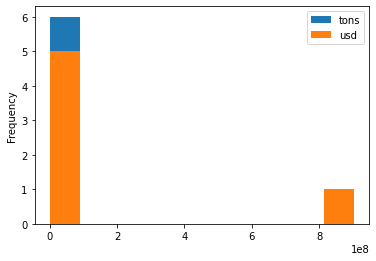

In [17]:
# Colocando esses dados em um Histograma, tem-se:

df_csv.describe('').plot.hist()

In [18]:
# Fazendo uma análise Matemática das Colunas numéricas
# Obtendo assim, a "Média, Desvio Padrão, os valores Máximos e Mínimos e as variações percentuais em tornda média"
df_ex.describe()

,year,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
count,52.000000,51.000000,51.000000,51.000000,52.000000,52.000000,51.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,2004.500000,114.748979,118.506002,125.885344,1908.418471,144.546950,177.068369,188.121370,467.150351,262.527616,374.807695,179.694886,687.859928
std,15.154757,36.167441,40.793617,41.574756,1863.436859,49.868663,47.624223,54.925766,256.503067,133.017827,223.422392,34.293891,576.471773
min,1979.000000,63.605148,60.073068,64.431808,100.000000,71.472960,98.206500,100.000000,100.000000,100.000000,100.000000,100.000000,96.500000
25%,1991.750000,84.133705,85.610143,86.789074,317.160758,100.176110,132.769101,138.755247,259.125441,147.057103,175.558018,166.484173,192.448843
50%,2004.500000,105.430517,108.168059,116.833463,1070.325023,151.344996,186.966070,207.486597,444.923037,230.386693,308.456992,188.567822,486.632829
75%,2017.250000,138.227236,140.074323,159.373949,3270.920556,181.955500,215.039423,231.613527,676.317034,369.965438,540.280158,205.954215,1073.047344
max,2030.000000,202.687291,237.390571,211.491372,6102.244946,239.096864,254.300715,275.393270,978.073487,547.625878,848.364039,221.476562,2013.057175


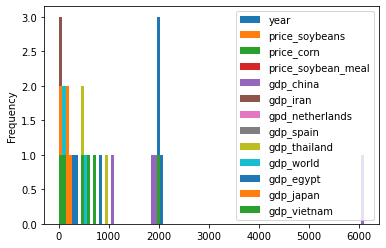

In [19]:
# Colocando esses dados em um Histograma, tem-se:

df_ex.describe('').plot.hist(bins=100)

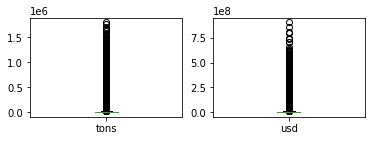

In [20]:
# Cria um gráfico tipo box and whisker plots (o famoso boxplot)
from matplotlib import pyplot
df_csv.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

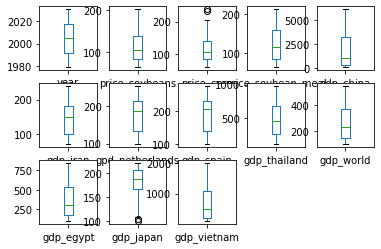

In [21]:
# Cria um gráfico tipo box and whisker plots (o famoso boxplot)
from matplotlib import pyplot
df_ex.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
pyplot.show()

### Organizando os dados para uma melhor compressão e análise.

- Essa organização será feita em uma Tabela Dinâmica

In [22]:
# Filtrando os dados

# Filtrando por cada um dos Tipos
df_temp = df_csv[ df_csv['type'] == 'Export'] 

# Filtrando por cada um dos Produtos
df_temp = df_temp[ df_temp['product'].isin(['soybeans','soybean_oil','soybean_meal']) ] 

# Filtrando por cada um dos Grupos
df_temp = df_temp.groupby(['date','product'])[['tons','usd']].sum()

# Alterando o índice Padrão
df_temp.reset_index(inplace=True) 

# Alterando o formato dos dados
df_temp.date = pd.to_datetime(df_temp.date).dt.strftime('%m/%Y')

In [23]:
# Criando a Tabela Dinâmica para o arquivo "CSV"

df_temp_usd = df_temp.pivot(index='date', columns='product', values='usd')
df_temp_usd

product,soybean_meal,soybean_oil,soybeans
date,,,
01/1997,133239012.0,34717077.0,4.118740e+06
01/1998,78284388.0,13601299.0,6.819330e+05
01/1999,115200364.0,37921236.0,9.115549e+06
01/2000,69173136.0,13128993.0,5.507660e+06
01/2001,174883937.0,27442599.0,4.797052e+07
...,...,...,...
12/2015,386597279.0,115338933.0,2.817208e+08
12/2016,372004358.0,59166636.0,2.731218e+08
12/2017,236110837.0,39731081.0,9.133119e+08


In [24]:
# Tabela Dinâmica

df_temp_tons = df_temp.pivot(index='date', columns='product', values='tons')
df_temp_tons

product,soybean_meal,soybean_oil,soybeans
date,,,
01/1997,486775.060,66915.872,14030.000
01/1998,305397.731,21378.945,1624.160
01/1999,727099.273,64680.249,39262.486
01/2000,428397.944,34896.985,33611.620
01/2001,863754.986,93861.429,244027.786
...,...,...,...
12/2015,1042707.478,175433.739,731439.903
12/2016,1012049.282,73989.384,653098.393
12/2017,674057.295,50943.495,2355418.012


In [25]:
# Obtendo os dados anuais

# Criando uma cópia
temp = df_temp_usd.copy()

# Alterando ou reiniciando o índice
temp.reset_index(inplace=True) 

# Alterando o formato dos dados
temp.date = pd.to_datetime(temp.date).dt.strftime('%Y')

df_temp_usd_y = temp.groupby(['date'])[['soybeans','soybean_oil','soybean_meal']].sum()

# Criando uma cópia conforme a quantidade de toneladas
temp = df_temp_tons.copy() 

# Alterando ou reiniciando o índice
temp.reset_index(inplace=True) 

# Alterando o formato dos dados
temp.date = pd.to_datetime(temp.date).dt.strftime('%Y')

df_temp_tons_y = temp.groupby(['date'])[['soybeans','soybean_oil','soybean_meal']].sum()

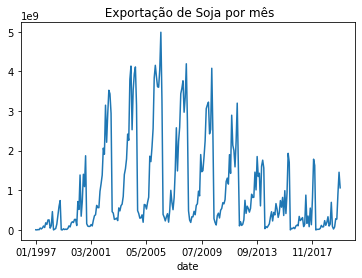

In [26]:
# Representação gráfica da Soja

df_temp_usd.soybeans.plot()

plt.title(' Exportação de Soja por mês')
plt.show()

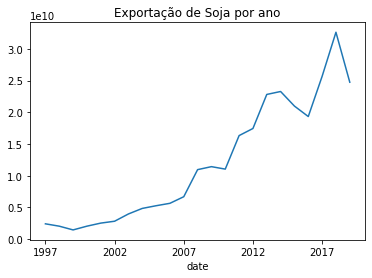

In [27]:
# Representação gráfica da Soja

df_temp_usd_y.soybeans.plot()

plt.title('Exportação de Soja por ano')
plt.show()

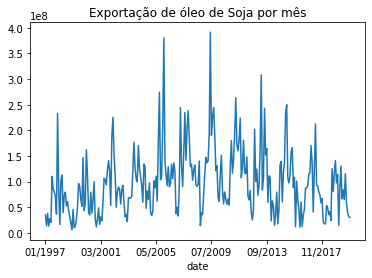

In [28]:
# Representação gráfica do Óleo de Soja

df_temp_usd.soybean_oil.plot()

plt.title('Exportação de óleo de Soja por mês')
plt.show()

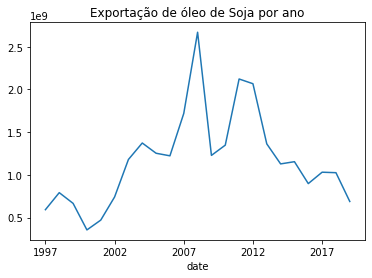

In [29]:
# Representação gráfica do Óleo de Soja

df_temp_usd_y.soybean_oil.plot()

plt.title('Exportação de óleo de Soja por ano')
plt.show()

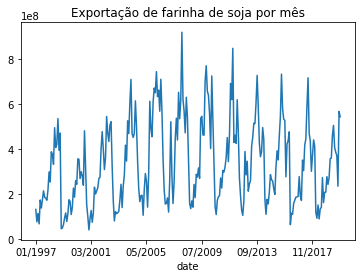

In [30]:
# Representação gráfica da Farinha de Soja

df_temp_usd.soybean_meal.plot()

plt.title('Exportação de farinha de soja por mês')
plt.show()

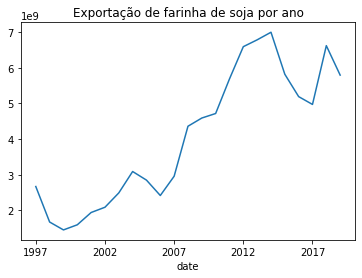

In [31]:
# Representação gráfica da Farinha de Soja

df_temp_usd_y.soybean_meal.plot()

plt.title('Exportação de farinha de soja por ano')
plt.show()

### **Fazendo a verificação de quais são os 3 produtos mais importantes exportados pelo Brasil nos últimos 5 anos.**


In [32]:
# Verificando a quantidade de Produtos únicos

df_csv['product'].unique()


array(['corn', 'soybean_meal', 'soybean_oil', 'soybeans', 'sugar',
       'wheat'], dtype=object)

### **Preparando os dados**

In [33]:
# Preparando os dados

# Filtrando de acordo o tipo
df_temp = df_csv[ df_csv['type'] == 'Export'] 

# Alterando o formato dos dados
df_temp.date = pd.to_datetime(df_temp.date).dt.strftime('%Y')

# Organizando pelo grupo
df_temp = df_temp.groupby(['date','product'])[['tons','usd']].sum()

# Alterando ou reiniciando o índice
df_temp.reset_index(inplace=True)


In [34]:
# Verificando os 15 primeiros elementos dos nossos dados

df_temp.head(15)

,date,product,tons,usd
0,1997,corn,3.568950e+05,5.163493e+07
1,1997,soybean_meal,9.965945e+06,2.668177e+09
2,1997,soybean_oil,1.117451e+06,5.923224e+08
3,1997,soybeans,8.195025e+06,2.407409e+09
4,1997,sugar,2.521670e+06,7.242544e+08
5,1998,corn,6.033643e+03,1.155060e+07
6,1998,soybean_meal,9.947875e+06,1.671167e+09
7,1998,soybean_oil,1.300080e+06,7.915809e+08
8,1998,soybeans,8.679492e+06,2.036069e+09
9,1998,sugar,3.535548e+06,8.376088e+08


In [35]:
# Organizando, selecionando e criando uma tabela Dinâmica com valores de "USD"

df_temp2_usd = df_temp.pivot(index='date', columns='product', values='usd')
df_temp2_usd = df_temp2_usd[-5:]
df_temp2_usd

product,corn,soybean_meal,soybean_oil,soybeans,sugar,wheat
date,,,,,,
2015,5.002189e+09,5.821009e+09,1.153975e+09,2.097567e+10,7.569996e+09,353335814.0
2016,3.736202e+09,5.192781e+09,8.975183e+08,1.932843e+10,1.038813e+10,115392534.0
2017,4.628510e+09,4.973223e+09,1.030942e+09,2.566280e+10,1.137459e+10,102835660.0
2018,3.956254e+09,6.624036e+09,1.025232e+09,3.261986e+10,6.490856e+09,40527570.0
2019,7.124566e+09,5.796674e+09,6.882796e+08,2.473877e+10,5.114913e+09,114853808.0


In [36]:
# Organizando, selecionando e criando uma tabela Dinâmica com os valores dos "TONS"

df_temp2_tons = df_temp.pivot(index='date', columns='product', values='tons')
df_temp2_tons = df_temp2_tons[-5:]
df_temp2_tons

product,corn,soybean_meal,soybean_oil,soybeans,sugar,wheat
date,,,,,,
2015,2.890038e+07,1.482660e+07,1669874.182,5.430348e+07,2.380948e+07,1778870.494
2016,2.186444e+07,1.444379e+07,1253542.300,5.157381e+07,2.880695e+07,713326.228
2017,2.925533e+07,1.417674e+07,1342365.392,6.800659e+07,2.861423e+07,617664.418
2018,2.274727e+07,1.666998e+07,1414356.108,8.214744e+07,2.114488e+07,221278.511
2019,4.183192e+07,1.653038e+07,1031289.620,7.030014e+07,1.765812e+07,554696.613


### *Vamos visualizar gráficamente os resultados*

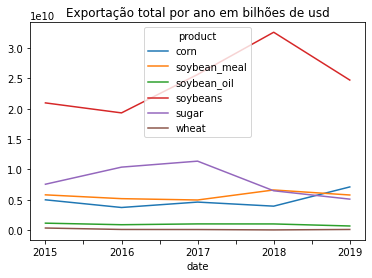

In [170]:
# Representação gráfica da Exportação por ano desde 2015 - 2019

df_temp2_usd.plot()

plt.title('Exportação total por ano em bilhões de usd')
plt.show()

In [168]:
# Verificando o valor Total acumulado em bilhões /usd

for column in df_temp2_usd.columns:
    total_period = sum(df_temp2_usd[column])
    print('Exportação total de % s em bilhões de usd %s \n' % (column, total_period/1000000000))

Exportação total de corn em bilhões de usd 24.44772091 

Exportação total de soybean_meal em bilhões de usd 28.407723437 

Exportação total de soybean_oil em bilhões de usd 4.795946873 

Exportação total de soybeans em bilhões de usd 123.325529857 

Exportação total de sugar em bilhões de usd 40.938486021 

Exportação total de wheat em bilhões de usd 0.726945386 



**Algumas considerações**:


Sendo assim, os 3 produtos mais importantes exportados pelo Brasil nos últimos 5 anos forão:

- Soja

- Açuacar

- Farinha de Soja


## **Verificando as principais rotas de exportação do Milho nos últimos anos.**

- Verificando qual é a rota principal



In [39]:
# Organizando e filtrando os dados

df_temp = df_csv[ df_csv['type'] == 'Export'] #filter by type

df_temp = df_temp[ df_temp['product'] == 'corn' ]  #filter by product

# Alterando o formato dos dados
df_temp.date = pd.to_datetime(df_temp.date).dt.strftime('%Y')

# Organizando em função do grupo, ou agrupando
df_temp = df_temp.groupby(['date','route'])[['usd']].sum()

# Alterando ou reiniciando o ídice
df_temp.reset_index(inplace=True) 

# Criação da Tabela Dinâmica
df_temp3 = df_temp.pivot(index='date', columns='route', values='usd')
df_temp3

route,Air,Ground,Other,River,Sea
date,,,,,
1997,211120.0,7139185.0,33715.0,NaN,4.425091e+07
1998,83438.0,5515412.0,81798.0,NaN,5.869953e+06
1999,177534.0,5453204.0,61674.0,NaN,1.113877e+06
2000,159469.0,7253407.0,17538.0,NaN,1.493446e+06
2001,123122.0,2371886.0,1930.0,NaN,4.753710e+08
2002,129246.0,5436253.0,2104.0,362611.0,2.595088e+08
2003,132442.0,4041447.0,NaN,1876974.0,3.629310e+08
2004,159120.0,9078129.0,71595.0,7000430.0,5.673501e+08
2005,270580.0,9143842.0,62.0,NaN,1.113189e+08


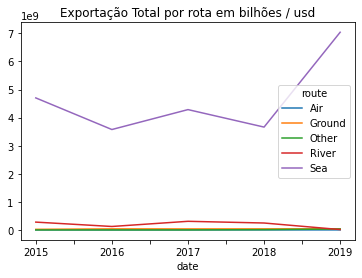

In [40]:
# Apresentando os valores gráficamente - Exportação total por rota ->> 2015 - 2019
df_temp3[-5:].plot()

plt.title('Exportação Total por rota em bilhões / usd')
plt.show()

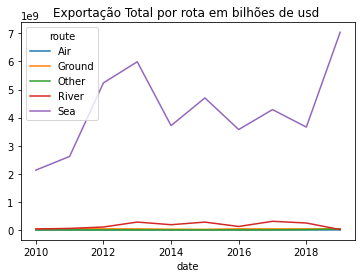

In [171]:
# Apresentando os valores gráficamente - Exportação total por rota ->> 2010 - 2019
df_temp3[-10:].plot()

plt.title('Exportação Total por rota em bilhões de usd ')
plt.show()

**Algumas considerações**:

Conforme os resultados apresentados, pode-se concluir que a principal rota é **marítima**, considerando os últimos 5 ou 10 anos.

## **Vamos verificar se de fato a rota importa**

In [45]:
# Vamos organizar e filtrar os dados pelo seu Tipo
df_temp = df_csv[ df_csv['type'] == 'Export'] 

# Organizando por grupo
df_temp = df_temp.groupby(['product','route'])[['usd']].sum()

# Alterando ou reiniciando o índice
df_temp.reset_index(inplace=True)

### *Verificando o total de produtos exportados por rota*

In [50]:
# Total de produtos exportados por rota

print('\n',' '*7,'Total de produtos exportados por rota\n','--'*26)

for column in df_temp['product'].unique():
    
    df_temp_c = df_temp[ df_temp['product'].isin([str(column)]) ] 
    print(' '*15,'Product: %s \n' % column,'--'*26)
    
    if column == 'wheat':
        for i in range(4):
            print('Route: ', (df_temp_c.iloc[i,1]),' Percent: ', 
                  ( round((df_temp_c.iloc[i,2])/(df_temp_c.usd.sum())*100),3) )
    else:
        for i in range(5):
            print('Route: ', (df_temp_c.iloc[i,1]),' Percent: ', 
                  ( round((df_temp_c.iloc[i,2])/(df_temp_c.usd.sum())*100),3) )
    print()
    print('--'*26)


         Total de produtos exportados por rota
 ----------------------------------------------------
                Product: corn 
 ----------------------------------------------------
Route:  Air  Percent:  (0, 3)
Route:  Ground  Percent:  (1, 3)
Route:  Other  Percent:  (0, 3)
Route:  River  Percent:  (3, 3)
Route:  Sea  Percent:  (96, 3)

----------------------------------------------------
                Product: soybean_meal 
 ----------------------------------------------------
Route:  Air  Percent:  (0, 3)
Route:  Ground  Percent:  (0, 3)
Route:  Other  Percent:  (0, 3)
Route:  River  Percent:  (0, 3)
Route:  Sea  Percent:  (100, 3)

----------------------------------------------------
                Product: soybean_oil 
 ----------------------------------------------------
Route:  Air  Percent:  (0, 3)
Route:  Ground  Percent:  (1, 3)
Route:  Other  Percent:  (0, 3)
Route:  River  Percent:  (0, 3)
Route:  Sea  Percent:  (98, 3)

--------------------------------------------

**Algumas considerações**:

- Pode se perceber que cada produto praticamente passa por apenas um caminho. O que nos faz concluir que , ao exportar produtos diferentes, a rota é importante.

## Analisando quais países foram os parceiros comerciais mais importantes para o Brasil em termos de **Milho** e *açúcar* nos últimos 3 anos. 

- Para isso vamos considerar o *Volume* como sendo o indicador de parceria comercial no processo de importação e exportação em dólares americanos.

In [51]:
# Organizando e preparando os dados Temporais

# Organizando e filtrando por Produto
df_temp = df_csv[ df_csv['product'].isin(['corn','sugar']) ]  

# Alterando o formato dos dados
df_temp.date = pd.to_datetime(df_temp.date).dt.strftime('%Y')

# Agrupando os dados
df_temp = df_temp.groupby(['date','product','type','country'])[['usd']].sum()

# Alterando ou reiniciando o índice
df_temp.reset_index(inplace=True)

# Selecionando para os últimos 3 anos.
df_temp = df_temp[ df_temp['date'].isin(['2019','2018','2017']) ] 
df_temp

,date,product,type,country,usd
3221,2017,corn,Export,Algeria,78619482.0
3222,2017,corn,Export,Angola,3285862.0
3223,2017,corn,Export,Argentina,7368989.0
3224,2017,corn,Export,Bangladesh,158604367.0
3225,2017,corn,Export,Belgium,4954.0
...,...,...,...,...,...
3920,2019,sugar,Import,Taiwan,338.0
3921,2019,sugar,Import,Thailand,1383.0
3922,2019,sugar,Import,Turkey,81.0
3923,2019,sugar,Import,United Kingdom,0.0


### Para o  **Milho**

In [52]:
# MILHO


# Selecionando o Produto
df_temp4_corn = df_temp[ df_temp['product'].isin(['corn']) ]

# Agrupando
df_temp4_corn = df_temp4_corn.groupby(['type','country'])[['usd']].sum()

# Alterando ou reiniciando o índice
df_temp4_corn.reset_index(inplace=True)

# Criação da Tabela Dinâmica
df_temp4_corn = df_temp4_corn.pivot(index='country', columns='type', values='usd')

# Dados de Entrada
df_temp4_corn = df_temp4_corn.fillna(0)

# Criando recurso comercial - Comercio Total
df_temp4_corn['Total_trade'] =  df_temp4_corn['Export'] + df_temp4_corn['Import']

# Alterando ou reiniciando o índice
df_temp4_corn.reset_index(inplace=True)

In [53]:
# Verificando os 12 principais parceiros - 2017 a 2019

df_temp4_corn.nlargest(12, 'Total_trade')

type,country,Export,Import,Total_trade
46,Iran,2.822336e+09,0.0,2.822336e+09
53,Japan,1.574976e+09,0.0,1.574976e+09
110,Vietnam,1.551035e+09,0.0,1.551035e+09
31,Egypt,1.375065e+09,0.0,1.375065e+09
93,Spain,1.335770e+09,10635.0,1.335780e+09
92,South Korea,1.024568e+09,0.0,1.024568e+09
99,Taiwan,8.155653e+08,0.0,8.155653e+08
61,Malaysia,6.963335e+08,0.0,6.963335e+08
8,Bangladesh,5.278790e+08,0.0,5.278790e+08
80,Paraguay,9.463514e+07,374158249.0,4.687934e+08


### Para o **Açucar**

In [54]:
# AÇUCAR

# Selecionando por Produto
df_temp4_sugar = df_temp[ df_temp['product'].isin(['sugar']) ]

# Agrupando
df_temp4_sugar = df_temp4_sugar.groupby(['type','country'])[['usd']].sum()

# Reiniciando o índice
df_temp4_sugar.reset_index(inplace=True)

# Criando a Tabela Dinâmica
df_temp4_sugar = df_temp4_sugar.pivot(index='country', columns='type', values='usd')

# Dados de entrada
df_temp4_sugar = df_temp4_sugar.fillna(0)

# Criando recurso comercial - Comercio Total
df_temp4_sugar['Total_trade'] =  df_temp4_sugar['Export'] + df_temp4_sugar['Import']

# Reiniciando o índice
df_temp4_sugar.reset_index(inplace=True)

In [55]:
# Verificando os 12 principais parceiros - 2017 a 2019

df_temp4_sugar.nlargest(12, 'Total_trade')

type,country,Export,Import,Total_trade
2,Algeria,2.176381e+09,0.0,2.176381e+09
13,Bangladesh,2.063175e+09,0.0,2.063175e+09
68,India,1.696095e+09,422.0,1.696095e+09
148,United Arab Emirates,1.538398e+09,0.0,1.538398e+09
120,Saudi Arabia,1.380456e+09,0.0,1.380456e+09
103,Nigeria,1.336515e+09,0.0,1.336515e+09
71,Iraq,1.158541e+09,0.0,1.158541e+09
86,Malaysia,1.039031e+09,0.0,1.039031e+09
43,Egypt,1.010584e+09,0.0,1.010584e+09
95,Morocco,9.315804e+08,0.0,9.315804e+08


**Algumas considerações**:

Percebe-se que o Brasil é basicamente exportador de milho e açúcar.

Destino de exportação: 

- O **Milho**: Vem de diverso paises ou seja, de quase todos os continentes, exceto Oceania.

- O **Açúcar**: Está concentrado na Ásia e nas região próxima e no Oriente Médio.

## **Verificando quais são os 5 estados mais importantes em termos de exportações.**

In [56]:
# Ornaizando e filtarndo os dados

# Filtrado pelo seu Tipo
df_temp = df_csv[ df_csv['type'] == 'Export'] 

# Alterando o formato dos dados
#df_temp.date = pd.to_datetime(df_temp.date).dt.strftime('%Y')

# Agrupando os dados
df_temp = df_temp.groupby(['product','state'])[['usd']].sum()

# Reiniciando o índice
df_temp.reset_index(inplace=True)
df_temp

,product,state,usd
0,corn,AC,1.857114e+06
1,corn,AL,1.800000e+01
2,corn,AM,6.620000e+02
3,corn,AP,2.498760e+05
4,corn,BA,1.476464e+08
...,...,...,...
131,wheat,RJ,3.124800e+04
132,wheat,RO,3.275000e+03
133,wheat,RS,1.555925e+09
134,wheat,SC,2.540009e+07


In [57]:
def summary_most_important_state_per_product(data=df_temp, products=['corn']):
    
      
    print('\n5 Estados mais importantes em termos de exportações por produto\n','--'*26)
    
    for product in products:
        temp = data[ data['product'] == str(product) ]
        temp = temp.nlargest(5,'usd')
        
        
        print(' '*15,'Product: %s \n' % product,'--'*26)
        print('  1º:  %s \n  2º:  %s \n  3º:  %s \n  4º:  %s \n  5º:  %s ' % 
              (temp['state'].iloc[0],temp['state'].iloc[1],temp['state'].iloc[2],temp['state'].iloc[3],temp['state'].iloc[4]))

    return print()

In [58]:
# Summary importante stats per product

summary_most_important_state_per_product(products=['corn','soybean_meal', 'soybean_oil', 'soybeans', 'sugar',
       'wheat'])


5 Estados mais importantes em termos de exportações por produto
 ----------------------------------------------------
                Product: corn 
 ----------------------------------------------------
  1º:  MT 
  2º:  PR 
  3º:  GO 
  4º:  MS 
  5º:  SP 
                Product: soybean_meal 
 ----------------------------------------------------
  1º:  MT 
  2º:  PR 
  3º:  RS 
  4º:  GO 
  5º:  BA 
                Product: soybean_oil 
 ----------------------------------------------------
  1º:  PR 
  2º:  RS 
  3º:  MT 
  4º:  SC 
  5º:  GO 
                Product: soybeans 
 ----------------------------------------------------
  1º:  MT 
  2º:  PR 
  3º:  RS 
  4º:  GO 
  5º:  MS 
                Product: sugar 
 ----------------------------------------------------
  1º:  SP 
  2º:  MG 
  3º:  PR 
  4º:  AL 
  5º:  MS 
                Product: wheat 
 ----------------------------------------------------
  1º:  RS 
  2º:  PR 
  3º:  SC 
  4º:  SP 
  5º:  MS 



# 5° Criando o nosso Modelo


## **Pré-Processamento dos Dados**

In [59]:
# Vamos visualizar os nossos dados
df_csv.head()

,date,product,state,country,type,route,tons,usd
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0


In [60]:
# Verificação de dados da cauda ->>Formato "EXCEL"

df_ex.tail()

,year,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
47,2026,145.203519,150.142281,167.410250,5126.923701,208.285085,235.511277,255.045373,852.031753,477.054784,739.037617,215.382241,1691.310433
48,2027,150.660041,154.391956,171.480405,5362.762191,215.582431,239.985991,259.891235,881.883004,493.768577,764.930077,216.889916,1769.110713
49,2028,156.116564,158.641630,175.550560,5604.086489,223.147862,244.665718,264.959114,912.830910,511.096390,791.773755,218.408146,1848.720695
50,2029,161.573086,162.891304,179.620715,5850.666295,230.993806,249.436700,270.125817,944.926309,529.066687,819.612750,219.937003,1930.064405
51,2030,167.029608,167.140979,183.690870,6102.244946,239.096864,254.300715,275.393270,978.073487,547.625878,848.364039,221.476562,2013.057175


In [61]:
# Organizando e filtrando os dados

# Filtrando pelo seu Tipo
df_temp = df_csv[ df_csv['type'] == 'Export'] 

# Filtarndo pelo Produto
df_temp = df_temp[ df_temp['product'].isin(['soybeans','soybean_meal','corn']) ] 

# Change data format
df_temp.date = pd.to_datetime(df_temp.date).dt.strftime('%Y')

# Agrupando-os
df_temp = df_temp.groupby(['date','product'])[['tons']].sum()

# Reiniciando o índice
df_temp.reset_index(inplace=True) 

# Criação da Tabela Dinâmica
df_tons = df_temp.pivot(index='date', columns='product', values='tons')
df_tons

product,corn,soybean_meal,soybeans
date,,,
1997,3.568950e+05,9.965945e+06,8.195025e+06
1998,6.033643e+03,9.947875e+06,8.679492e+06
1999,5.321076e+03,1.005007e+07,8.096035e+06
2000,5.554756e+03,9.055435e+06,1.072512e+07
2001,5.410199e+06,1.058249e+07,1.448690e+07
2002,2.727390e+06,1.186623e+07,1.480649e+07
2003,3.509735e+06,1.301340e+07,1.839112e+07
2004,4.892188e+06,1.370836e+07,1.718609e+07
2005,1.069452e+06,1.432846e+07,2.206341e+07


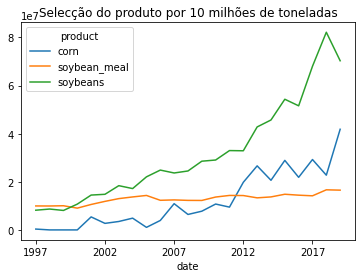

In [62]:
# basic plot: Select product per 10 million tons

df_tons.plot()

plt.title('Selecção do produto por 10 milhões de toneladas')
plt.show()

In [63]:
# Fazendo uma análise Matemática das Colunas numéricas - Estatísticas descritivas

df_tons.describe()

product,corn,soybean_meal,soybeans
count,2.300000e+01,2.300000e+01,2.300000e+01
mean,1.212709e+07,1.294884e+07,3.191125e+07
std,1.186351e+07,2.036009e+06,2.121482e+07
min,5.321076e+03,9.055435e+06,8.096035e+06
25%,3.118563e+06,1.205801e+07,1.599629e+07
50%,7.781248e+06,1.333354e+07,2.486963e+07
75%,2.124733e+07,1.430875e+07,4.424113e+07
max,4.183192e+07,1.666998e+07,8.214744e+07


## **Analisando a Autocorrelação e a Autocorrelação Parcial**

## 1. Para o **Milho**

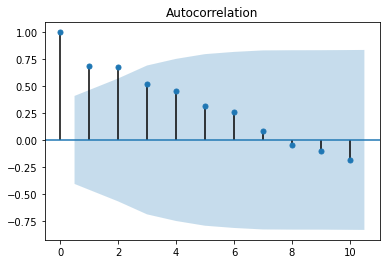

In [71]:
# Representação gráfica da Autocorrelação


plot_acf(df_tons.corn, lags=10)
plt.show()

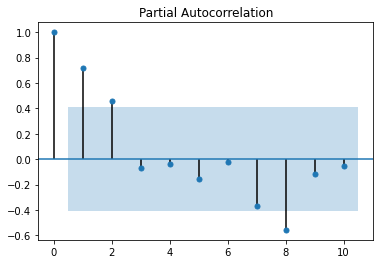

In [70]:
# Representação gráfica da Autocorrelação Parcial

plot_pacf(df_tons.corn, lags=10)
plt.show()

## 2. Para  **Farinha de Soja**

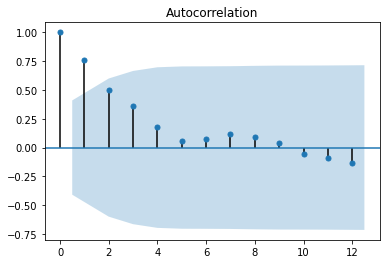

In [67]:
# Representação gráfica da Autocorrelação
plot_acf(df_tons.soybean_meal, lags=12)
plt.show()

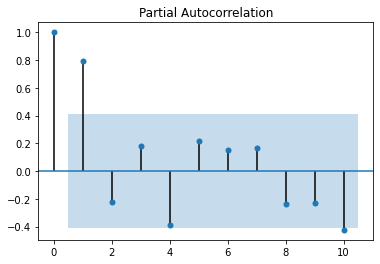

In [72]:
# Representação gráfica da Autocorrelação Parcial
plot_pacf(df_tons.soybean_meal, lags=10)
plt.show()

## 3. Para a **Soja**

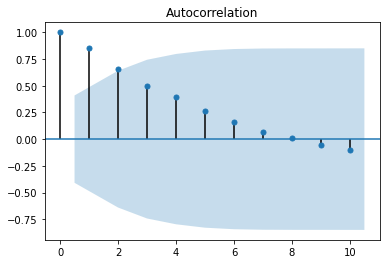

In [73]:
# Representação gráfica da Autocorrelação
plot_acf(df_tons.soybeans, lags=10)
plt.show()

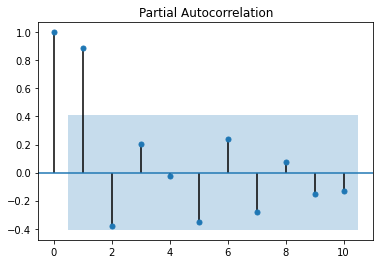

In [74]:
# # Representação gráfica da Autocorrelação Parcial
plot_pacf(df_tons.soybeans, lags=10)
plt.show()

**Algumas considerações**:

- Note que é possível perceber que tem-se uma presença de autocorrelação significativa e processos de média móvel para todas as séries.

## Separando os dados em **Treino** e **Teste**

- Sabe-se que a separação dos dados é necessária e importante para validar os modelos e escolher aquele que aprsenta menos erro.

- Para essa análise os dados para realizarmos a validação serão baseados em 4 observações.

In [75]:
# Dados de Treino e dados de Testes para Validação do Modelo

x_tons_treino = df_tons[:-4]
y_tons_validação = df_tons[-4:]

In [76]:
# Exibindo os dados de treino

x_tons_treino.tail()

product,corn,soybean_meal,soybeans
date,,,
2011,9.479281e+06,1.433487e+07,3.297554e+07
2012,1.979615e+07,1.428904e+07,3.289181e+07
2013,2.662047e+07,1.333354e+07,4.279507e+07
2014,2.063022e+07,1.371632e+07,4.568718e+07
2015,2.890038e+07,1.482660e+07,5.430348e+07


In [77]:
# Exibindo os dados de Validação

y_tons_validação

product,corn,soybean_meal,soybeans
date,,,
2016,2.186444e+07,1.444379e+07,5.157381e+07
2017,2.925533e+07,1.417674e+07,6.800659e+07
2018,2.274727e+07,1.666998e+07,8.214744e+07
2019,4.183192e+07,1.653038e+07,7.030014e+07


## *Realizando o teste de raiz unitária*

- Esse tipo de teste identifica, com base em algum nível de significância, se uma série tem uma raiz unitária ou estacinaridade. 

- Caso haja uma raiz unitária, a série deve ser transformada até que seja estacionária, para depois então ser modelada.

## 1. Para o **Milho**

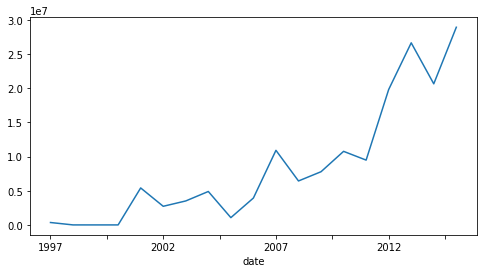

In [78]:
#  Plotando os dados.
x_tons_treino.corn.plot(figsize=(8,4))
plt.show()

In [79]:
# Executando o teste de ADF
from statsmodels.tsa.stattools import adfuller
adf = adfuller(x_tons_treino.corn, maxlag = 1)
adf[0]

0.5452410753598418

In [80]:
# Valores Críticos
adf[4]

{'1%': -3.889265672705068, '10%': -2.66698384083045, '5%': -3.0543579727254224}

## 2. Para a **Farinha de Soja**

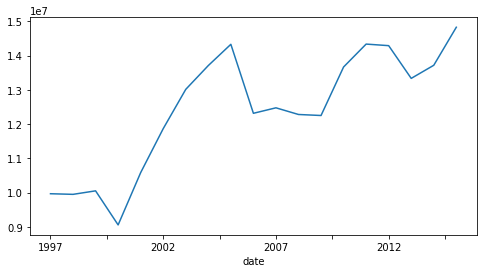

In [81]:
#  Plotando os dados.
x_tons_treino.soybean_meal.plot(figsize=(8,4))
plt.show()

In [82]:
# Executando o teste de ADF
from statsmodels.tsa.stattools import adfuller
adf = adfuller(x_tons_treino.soybean_meal, maxlag = 1)
adf[0]

-1.1563954633853453

In [83]:
# Valores Críticos
adf[4]

{'1%': -3.859073285322359,
 '10%': -2.6609064197530863,
 '5%': -3.0420456927297668}

## 3. Para a **Soja**

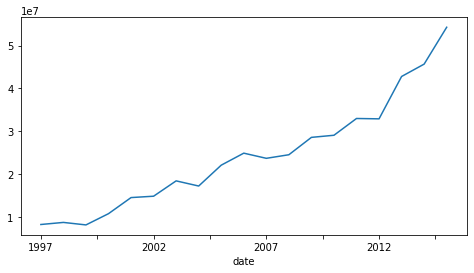

In [84]:
#  Plotando os dados.
x_tons_treino.soybeans.plot(figsize=(8,4))
plt.show()

In [85]:
# Executando o teste de ADF
from statsmodels.tsa.stattools import adfuller
adf = adfuller(x_tons_treino.soybeans, maxlag = 1)
adf[0]

2.7142023038771734

In [86]:
# Valores Críticos
adf[4]

{'1%': -3.889265672705068, '10%': -2.66698384083045, '5%': -3.0543579727254224}

**Algumas considerações**:

- Note que todos os resultados das séries selecionadas indicaram a presença de raiz unitária, mesmo considerando especificações diferentes. Resultados com significância de 1%.

## **Verificando a Primeira diferença**

- Aplicando a primeira diferença para que possamos remover os valores ausentes gerados.

In [87]:
# Aplicando a primeira diferença para que possamos remover os valores ausentes gerados.

df_tons_diff = df_tons.diff()[1:]
df_tons_diff

product,corn,soybean_meal,soybeans
date,,,
1998,-3.508614e+05,-18070.115,4.844672e+05
1999,-7.125670e+02,102190.900,-5.834572e+05
2000,2.336800e+02,-994631.107,2.629089e+06
2001,5.404644e+06,1527058.366,3.761778e+06
2002,-2.682809e+06,1283738.356,3.195879e+05
2003,7.823454e+05,1147169.714,3.584627e+06
2004,1.382453e+06,694959.287,-1.205024e+06
2005,-3.822737e+06,620099.350,4.877313e+06
2006,2.866858e+06,-2014324.037,2.806219e+06


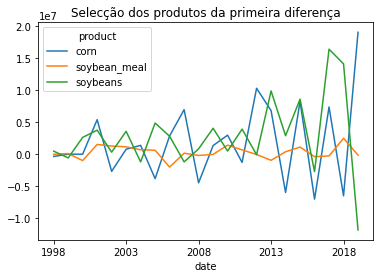

In [88]:
# Selecção dos produtos na primeira diferença por 10 milhões de toneladas

df_tons_diff.plot()

plt.title('Selecção dos produtos da primeira diferença')
plt.show()

## Realizado o teste da diferença, vamos separar novamente os dados em **Treino** e **Teste**

In [89]:
# Dados de Treino e Teste da Diferença
df_tons_diff_train = df_tons_diff[:-4]
df_tons_diff_validation = df_tons_diff[-4:]

In [90]:
# Visualizando o novo conjunto de Dados de "TREINO"
df_tons_diff_train.tail()

product,corn,soybean_meal,soybeans
date,,,
2011,-1.280034e+06,668770.681,3922108.453
2012,1.031687e+07,-45828.003,-83732.997
2013,6.824319e+06,-955496.965,9903267.364
2014,-5.990245e+06,382777.723,2892106.342
2015,8.270156e+06,1110273.774,8616302.967


In [91]:
# Visualizando o novo conjunto de Dados de "VALIDAÇÃO"
df_tons_diff_validation

product,corn,soybean_meal,soybeans
date,,,
2016,-7.035936e+06,-382804.864,-2.729677e+06
2017,7.390889e+06,-267047.792,1.643279e+07
2018,-6.508062e+06,2493232.099,1.414084e+07
2019,1.908465e+07,-139595.057,-1.184729e+07


## Realizando novamente o teste da **Raiz Unitária**

## 1. Para o **Milho**

In [92]:
# Executando o teste de ADF
from statsmodels.tsa.stattools import adfuller
adf = adfuller(df_tons_diff_train.corn, maxlag = 1)
adf[0]

-4.3775864651576235

In [93]:
# Valores Críticos
adf[4]

{'1%': -3.9240193847656246, '10%': -2.67389265625, '5%': -3.0684982031250003}

## 2. Para a **Farinha de Sojao**

In [94]:
# Executando o teste de ADF
from statsmodels.tsa.stattools import adfuller
adf = adfuller(df_tons_diff_train.soybean_meal, maxlag = 1)
adf[0]

-3.4360769601406997

In [95]:
# Valores Críticos
adf[4]

{'1%': -3.889265672705068, '10%': -2.66698384083045, '5%': -3.0543579727254224}

## 3. Para a **Soja**

In [96]:
# Executando o teste de ADF
from statsmodels.tsa.stattools import adfuller
adf = adfuller(df_tons_diff_train.soybeans, maxlag = 1)
adf[0]

-1.6894973797365087

In [97]:
# Valores Críticos
adf[4]

{'1%': -3.9240193847656246, '10%': -2.67389265625, '5%': -3.0684982031250003}

**Algumas considerações**:

- Com as séries em diferença, pode-se rejeitar a hipótese da presença de raiz unitária em todas as séries a 5% de significância, aceitando que as séries têm um processo estacionário. Sendo assim, podemos usar esta série para criar o modelo ou seja, podemos modelar a série.


## **Modelagem**

- Uraemos como modelo base para cada produto  ARIMA, da mesma forma que foi modelado no primeiro caso (*Caso 1*).

- É possível que nos depararemos com alguns problemas na modelagem, devido à baixa variabilidade de algumas variáveis adicionadas à pequena amostra.

## 1. Para  **Milho**

In [98]:
# MILHO

model_corn = pm.auto_arima(x_tons_treino.corn, start_p=1, start_q=1,
                      test='adf',       
                      max_p=3, max_q=3, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=581.180, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=589.286, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=585.700, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=583.905, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=587.478, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=572.490, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=570.842, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=572.782, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=572.389, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=569.197, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=583.736, Time=0.01 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=570.591, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=579.797, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=572.005, 

In [99]:
# Exibindo o Resultado

print(model_corn.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(2, 2, 0)   Log Likelihood                -281.598
Date:                Sun, 20 Dec 2020   AIC                            569.197
Time:                        15:02:29   BIC                            571.697
Sample:                             0   HQIC                           569.445
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9288      0.271     -3.428      0.001      -1.460      -0.398
ar.L2         -0.9463      0.236     -4.004      0.000      -1.410      -0.483
sigma2      1.608e+13   6.81e-15   2.36e+27      0.0

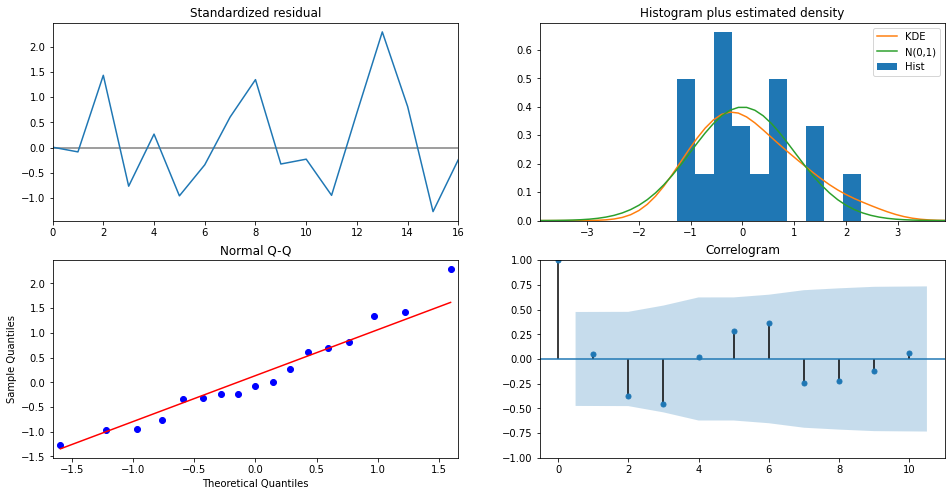

In [100]:
# Verificando o Diagnostico do Modelo

model_corn.plot_diagnostics(figsize=(16, 8))
plt.show()

## 2. Para a **Farinha de Soja**

In [101]:
# FARINHA DE SOJA

model_soybean_meal = pm.auto_arima(x_tons_treino.soybean_meal, start_p=1, start_q=1,
                      test='adf',       
                      max_p=2, max_q=2, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=528.977, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=529.141, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=530.624, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=530.991, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=527.299, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.199 seconds


In [102]:
# Exibindo o Resultado

print(model_soybean_meal.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -262.650
Date:                Sun, 20 Dec 2020   AIC                            527.299
Time:                        15:02:46   BIC                            528.133
Sample:                             0   HQIC                           527.382
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.368e+12   4.13e+11      3.315      0.001    5.59e+11    2.18e+12
Ljung-Box (L1) (Q):                   2.81   Jarque-Bera (JB):                 0.09
Prob(Q):                              0.09   Pr

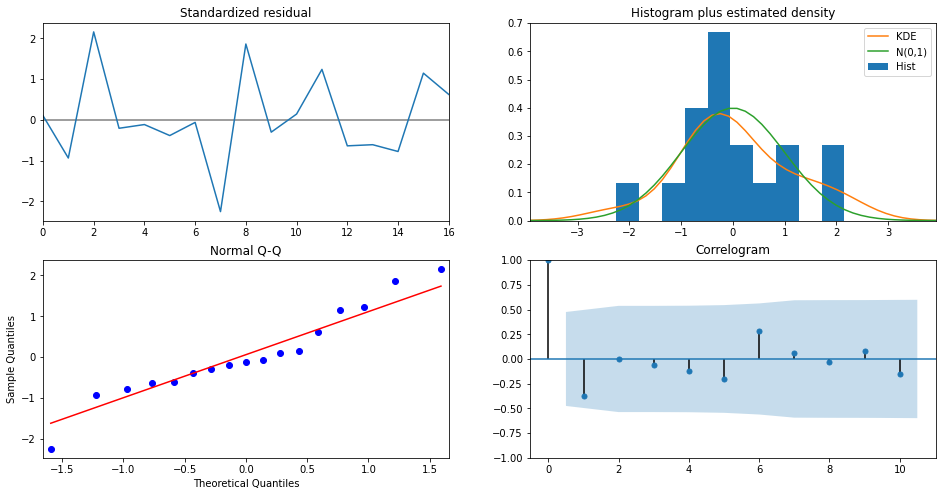

In [103]:
# Verificando o Diagnostico do Modelo

model_soybean_meal.plot_diagnostics(figsize=(16, 8))
plt.show()

## 3. Para a **Soja**

In [104]:
# SOJA

model_soybeans = pm.auto_arima(x_tons_treino.soybeans, start_p=1, start_q=1,
                      test='adf',       
                      max_p=10, max_q=10, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=565.608, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=573.316, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=566.098, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=570.155, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=571.614, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=566.828, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=566.968, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=565.223, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=563.450, Time=0.09 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=565.442, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=565.342, Time=0.05 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=567.247, Time=0.08 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=562.116, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=563.002, 

In [105]:
# Exibindo o Resultado

print(model_soybeans.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(3, 2, 0)   Log Likelihood                -277.058
Date:                Sun, 20 Dec 2020   AIC                            562.116
Time:                        15:03:03   BIC                            565.449
Sample:                             0   HQIC                           562.448
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0449      0.333     -3.137      0.002      -1.698      -0.392
ar.L2         -0.7577      0.356     -2.127      0.033      -1.456      -0.060
ar.L3         -0.4449      0.339     -1.314      0.1

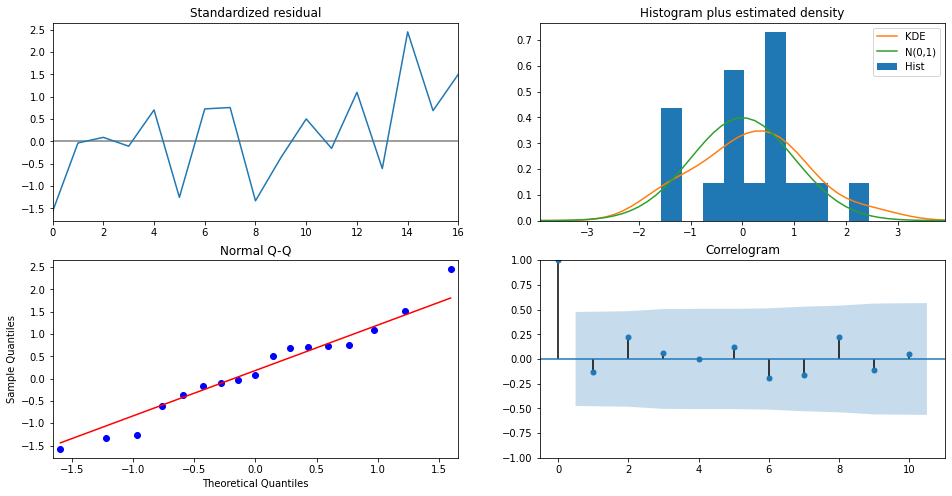

In [106]:
# Verificando o Diagnostico do Modelo

model_soybeans.plot_diagnostics(figsize=(16, 8))
plt.show()


**Algumas considerações**: 

- Os resíduos de todos os modelos não estão significativamente correlacionados.

##Fazendo Previsões com o modelo **ARIMA**

In [107]:
# Definindo um horizonte de previsão para visualização

n_periods = 4

index_of_all = df_tons.index
index_of_fc = y_tons_validação.index

##1. Para o **Milho**

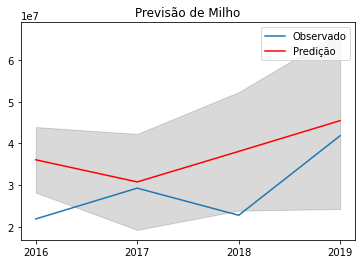

In [108]:
# MODELO ARIMA

# Previsões e intervalo de confiança
fc_arima_corn, confint_arima_corn = model_corn.predict(n_periods=n_periods, return_conf_int=True) 

# Preparando os dados para visualização
fc_arima_corn = pd.Series(fc_arima_corn, index=index_of_fc)
lower_series_corn = pd.Series(confint_arima_corn[:, 0], index=index_of_fc)
upper_series_corn = pd.Series(confint_arima_corn[:, 1], index=index_of_fc)


# Plotando o gráfico
plt.plot(y_tons_validação.corn)
plt.plot(fc_arima_corn, color='red')
plt.legend(['Observado','Predição'])
plt.fill_between(lower_series_corn.index, 
                 lower_series_corn, 
                 upper_series_corn, 
                 color='k', alpha=.15)

plt.title("Previsão de Milho")
plt.show()

##2. Para a **Farinha de Soja**

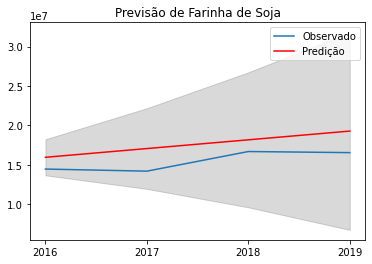

In [109]:
# Previsões e intervalo de confiança
fc_arima_soybean_meal, confint_arima_soybean_meal = model_soybean_meal.predict(n_periods=n_periods, return_conf_int=True) 

# Preparando os dados para visualização
fc_arima_soybean_meal = pd.Series(fc_arima_soybean_meal, index=index_of_fc)
lower_series_soybean_meal = pd.Series(confint_arima_soybean_meal[:, 0], index=index_of_fc)
upper_series_soybean_meal = pd.Series(confint_arima_soybean_meal[:, 1], index=index_of_fc)


# # Plotando o gráfico
plt.plot(y_tons_validação.soybean_meal)
plt.plot(fc_arima_soybean_meal, color='red')
plt.legend(['Observado','Predição'])
plt.fill_between(lower_series_soybean_meal.index, 
                 lower_series_soybean_meal, 
                 upper_series_soybean_meal, 
                 color='k', alpha=.15)

plt.title("Previsão de Farinha de Soja")
plt.show()


##3. Para a **Soja**

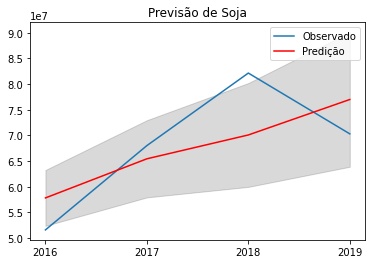

In [110]:
# Previsões e intervalo de confiança
fc_arima_soybeans, confint_arima_soybeans = model_soybeans.predict(n_periods=n_periods, return_conf_int=True) 

# Preparando os dados para visualização
fc_arima_soybeans = pd.Series(fc_arima_soybeans, index=index_of_fc)
lower_series_soybeans = pd.Series(confint_arima_soybeans[:, 0], index=index_of_fc)
upper_series_soybeans = pd.Series(confint_arima_soybeans[:, 1], index=index_of_fc)


# Plotando o gráfico
plt.plot(y_tons_validação.soybeans)
plt.plot(fc_arima_soybeans, color='red')
plt.legend(['Observado','Predição'])
plt.fill_between(lower_series_soybeans.index, 
                 lower_series_soybeans, 
                 upper_series_soybeans, 
                 color='k', alpha=.15)

plt.title("Previsão de Soja")
plt.show()

## **Modelagem multivariada**

- A primeira modelagem multivariada será feita de forma arbitrária, selecionando as variáveis dependentes diretamente.

In [111]:
# Visualisando os nossos dados
df_ex.head()

,year,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
0,1979,NaN,NaN,NaN,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,1980,100.000000,100.000000,100.000000,107.900000,81.200000,100.000000,101.200000,104.600000,102.100000,103.400000,103.200000,96.500000
2,1981,98.525508,103.888308,99.805440,113.402900,74.216800,99.500000,100.795200,110.771400,104.039900,105.674800,107.534400,102.097000
3,1982,83.406192,85.986430,86.596956,123.609161,83.939201,98.206500,102.004742,116.753056,104.664139,113.389060,111.083035,110.468954
4,1983,97.851743,108.168059,98.663318,136.958950,95.522811,99.974217,103.738823,123.291227,107.594735,123.480687,114.970941,118.312250


In [112]:
# Visualisando os nossos dados
df_ex.tail()

,year,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
47,2026,145.203519,150.142281,167.410250,5126.923701,208.285085,235.511277,255.045373,852.031753,477.054784,739.037617,215.382241,1691.310433
48,2027,150.660041,154.391956,171.480405,5362.762191,215.582431,239.985991,259.891235,881.883004,493.768577,764.930077,216.889916,1769.110713
49,2028,156.116564,158.641630,175.550560,5604.086489,223.147862,244.665718,264.959114,912.830910,511.096390,791.773755,218.408146,1848.720695
50,2029,161.573086,162.891304,179.620715,5850.666295,230.993806,249.436700,270.125817,944.926309,529.066687,819.612750,219.937003,1930.064405
51,2030,167.029608,167.140979,183.690870,6102.244946,239.096864,254.300715,275.393270,978.073487,547.625878,848.364039,221.476562,2013.057175


### **Compatibilizando para concatenar os dados**

In [113]:
# Compatibilizando os dados e mudando o tipo

# Criando uma cópia para não perdermos os dados originais.
df_ex_temp = df_ex.copy() #copy
df_ex_temp['year'] = df_ex_temp['year'].astype(int) 
df_ex_temp['year'] = df_ex_temp['year'].astype(str) 
df_ex_temp.index = df_ex_temp['year']  
df_ex_temp = df_ex_temp.drop(columns=['year']) 

In [114]:
# Separando os dados em "TREINO e VALIDAÇÃO"

# De 1997 até 2015
df_ex_treino = df_ex_temp[18:37] 
# De 2016 até 2019
df_ex_validação = df_ex_temp[37:41] 
# De 2020 até 2030
df_ex_test = df_ex_temp[41:] 

In [115]:
df_ex_treino = pd.concat([x_tons_treino, df_ex_treino], axis=1)
y_tons_validação = pd.concat([y_tons_validação, df_ex_validação], axis=1)
df_test = df_ex_test

In [116]:
# Visualizando os novos dados de treino.
df_ex_treino.head()

,corn,soybean_meal,soybeans,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
1997,356895.029,9.965945e+06,8.195025e+06,105.761629,93.204180,124.012650,560.722750,106.976296,152.738204,156.728085,345.124057,173.936618,218.683678,180.133771,299.095195
1998,6033.643,9.947875e+06,8.679492e+06,84.160030,80.831375,77.421718,604.459124,109.008846,159.916900,163.780849,318.894628,178.458970,235.084954,178.152299,316.442716
1999,5321.076,1.005007e+07,8.096035e+06,65.928699,71.823936,67.601747,651.002477,109.335873,167.912745,171.478549,333.563781,184.883493,249.425136,177.617842,331.631967
2000,5554.756,9.055435e+06,1.072512e+07,68.993825,70.173520,82.934920,706.337687,116.880048,174.965080,180.223955,348.574151,193.757900,262.894093,182.591142,354.182940
2001,5410198.846,1.058249e+07,1.448690e+07,63.605148,71.279115,80.029143,765.670053,117.815088,178.989277,187.252689,360.425672,198.601848,272.095387,183.321506,378.621563


In [117]:
# Visualizando os dados de validação
df_ex_validação.head()

,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
year,,,,,,,,,,,,
2016,136.707475,126.651480,155.159310,3009.387480,199.457893,212.492144,228.481190,651.871186,353.074433,512.214274,205.547136,986.279640
2017,135.244081,122.971792,154.470762,3217.035216,206.837835,218.654416,235.107145,678.597904,366.844336,533.215059,210.069173,1054.332935
2018,129.101989,130.859269,165.414699,3432.576576,195.668592,224.339431,240.749716,707.099016,380.050732,561.475457,210.699381,1129.190573
2019,123.250034,135.360386,148.243872,3641.963747,180.797779,228.377541,245.564711,724.069393,391.072203,592.918083,212.174276,1208.233913


In [118]:
# Os dados de Teste
df_test.head()

,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
year,,,,,,,,,,,,
2020,116.920726,127.345508,145.243944,3685.667312,169.949912,211.249225,225.919534,675.556744,379.328745,604.776444,201.141214,1240.856229
2021,121.166259,130.855976,148.695213,4024.748705,175.218360,217.586702,235.634074,716.765705,401.318974,621.710185,207.175450,1327.716165
2022,125.565952,134.463215,152.228491,4230.010888,181.266859,220.415329,238.697317,741.508301,415.172417,643.171485,208.832854,1395.429689
2023,130.125404,138.169893,155.845726,4441.511433,187.576609,223.721559,242.277776,767.319592,429.624226,665.559753,210.503517,1465.201174
2024,134.850415,141.978752,159.548913,4663.587005,194.212029,227.301104,246.154221,794.463105,444.821949,689.103567,212.187545,1538.461232


In [119]:
# Selecionando e agrupando os dados

# Organizar e filtrar por Produto
df_temp6 = df_csv[ df_csv['product'].isin(['corn','soybean_meal','soybeans']) ]  

# Alterando o formato dos dados
df_temp6.date = pd.to_datetime(df_temp6.date).dt.strftime('%Y')

# Agrupando os dados
df_temp6 = df_temp6.groupby(['date','product','type','country'])[['usd']].sum()

# Reiniciando o índice
df_temp6.reset_index(inplace=True)

###1. Para o **Milho**

In [120]:
# Selecionando o Produto
df_temp6_corn = df_temp6[ df_temp6['product'].isin(['corn']) ]

# Agrupando
df_temp6_corn = df_temp6_corn.groupby(['type','country'])[['usd']].sum()

# Reiniciando o índice
df_temp6_corn.reset_index(inplace=True)

# Criando a Tabela Dinâmica
df_temp6_corn = df_temp6_corn.pivot(index='country', columns='type', values='usd')

# Dados de entrada
df_temp6_corn = df_temp6_corn.fillna(0)

# Criando recurso - 'Total_trade'
df_temp6_corn['Total_trade'] =  df_temp6_corn['Export'] + df_temp6_corn['Import']

# Reiniciando o índice
df_temp6_corn.reset_index(inplace=True)

# Verificando os 10 principais parceiros.
df_temp6_corn.nlargest(10, 'Total_trade')

type,country,Export,Import,Total_trade
57,Iran,8.694450e+09,0.000000e+00,8.694450e+09
64,Japan,4.945267e+09,0.000000e+00,4.945267e+09
111,South Korea,4.553239e+09,0.000000e+00,4.553239e+09
132,Vietnam,3.819931e+09,0.000000e+00,3.819931e+09
118,Taiwan,3.418874e+09,0.000000e+00,3.418874e+09
38,Egypt,3.294368e+09,0.000000e+00,3.294368e+09
112,Spain,3.220829e+09,1.063500e+04,3.220839e+09
72,Malaysia,2.417669e+09,0.000000e+00,2.417669e+09
96,Paraguay,4.018169e+08,1.879839e+09,2.281655e+09
105,Saudi Arabia,1.607009e+09,0.000000e+00,1.607009e+09


###2. Para a **Farinha de Soja**

In [121]:
# Selecionando o Produto
df_temp6_soybean_meal = df_temp6[ df_temp6['product'].isin(['soybean_meal']) ]

# Agrupando-os
df_temp6_soybean_meal = df_temp6_soybean_meal.groupby(['type','country'])[['usd']].sum()

# Reiniciando o índice
df_temp6_soybean_meal.reset_index(inplace=True)

# Craindo a Tabela Dinâmica
df_temp6_soybean_meal = df_temp6_soybean_meal.pivot(index='country', columns='type', values='usd')

# Dados de entrada
df_temp6_soybean_meal = df_temp6_soybean_meal.fillna(0)

# Criando recusros - 'Total_trade'
df_temp6_soybean_meal['Total_trade'] =  df_temp6_soybean_meal['Export'] + df_temp6_soybean_meal['Import']

# Reiniciando o índice
df_temp6_soybean_meal.reset_index(inplace=True)

# Verificando os 10 principais parceiros.
df_temp6_soybean_meal.nlargest(10, 'Total_trade')

type,country,Export,Import,Total_trade
75,Netherlands,2.322441e+10,0.0,2.322441e+10
38,France,1.346868e+10,0.0,1.346868e+10
41,Germany,8.482795e+09,25230.0,8.482820e+09
109,Thailand,7.809265e+09,0.0,7.809265e+09
100,South Korea,5.957297e+09,7250.0,5.957305e+09
54,Indonesia,5.520220e+09,0.0,5.520220e+09
101,Spain,3.171328e+09,1225725.0,3.172553e+09
98,Slovenia,3.067915e+09,0.0,3.067915e+09
55,Iran,2.771266e+09,0.0,2.771266e+09
58,Italy,2.476368e+09,0.0,2.476368e+09


### 3. Para a **Soja**

In [122]:
# Selecionando o Produto
df_temp6_soybeans = df_temp6[ df_temp6['product'].isin(['soybeans']) ]

# Agrupando
df_temp6_soybeans = df_temp6_soybeans.groupby(['type','country'])[['usd']].sum()

# Reiniciando o índice
df_temp6_soybeans.reset_index(inplace=True)

# Criando a Tabela Dinâmica
df_temp6_soybeans = df_temp6_soybeans.pivot(index='country', columns='type', values='usd')

# Dados de entrada
df_temp6_soybeans = df_temp6_soybeans.fillna(0)

# Criando recursos - 'Total_trade'
df_temp6_soybeans['Total_trade'] =  df_temp6_soybeans['Export'] + df_temp6_soybeans['Import']

# # Reiniciando o índice
df_temp6_soybeans.reset_index(inplace=True)

# Verificando os 10 principais parceiros.
df_temp6_soybeans.nlargest(10, 'Total_trade')

type,country,Export,Import,Total_trade
18,China,1.839475e+11,443.0,1.839475e+11
63,Netherlands,1.686637e+10,0.0,1.686637e+10
86,Spain,1.447894e+10,0.0,1.447894e+10
94,Thailand,7.510417e+09,2419.0,7.510420e+09
35,Germany,5.501429e+09,0.0,5.501429e+09
93,Taiwan,4.769825e+09,515.0,4.769826e+09
49,Japan,3.898403e+09,10221.0,3.898413e+09
48,Italy,3.871871e+09,0.0,3.871871e+09
101,United Kingdom,3.544115e+09,0.0,3.544115e+09
45,Iran,3.498658e+09,0.0,3.498658e+09


## Utilização do modelo **AD hoc** para especificação do preço com base nos melhores parceiros.

- Entre as covariáveis adicionais, os 5 principais parceiros por produto serão usados para compor a especificação do modelo.

In [154]:
# Selecionando as variáveis de interesse e os recursos necessário.

corn_features = ['price_corn','gdp_iran','gdp_japan','gdp_vietnam']
soybean_meal_features = ['price_soybean_meal','gpd_netherlands','gdp_thailand']
soybeans_features = ['price_soybeans','gdp_china','gpd_netherlands','gdp_spain','gdp_thailand']

interest_corn = ['corn']
interest_soybean_meal = ['soybean_meal']
interest_soybeans = ['soybeans']

###1. Para o **Milho**

In [150]:
# MILHO

ols_model_corn = sm.OLS(df_ex_treino[interest_corn], df_ex_treino[corn_features])
ols_result_corn = ols_model_corn.fit()
print(ols_result_corn.summary())

                                 OLS Regression Results                                
Dep. Variable:                   corn   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              95.69
Date:                Sun, 20 Dec 2020   Prob (F-statistic):                    1.73e-10
Time:                        15:17:54   Log-Likelihood:                         -306.01
No. Observations:                  19   AIC:                                      620.0
Df Residuals:                      15   BIC:                                      623.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

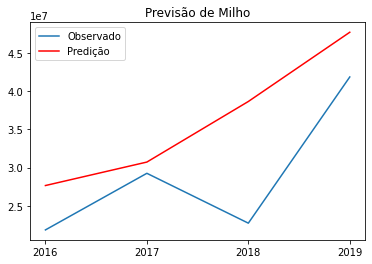

In [156]:
ols_fc_corn = ols_result_corn.predict(y_tons_validação[corn_features])

plt.plot(y_tons_validação[interest_corn])
plt.plot(ols_fc_corn, color='red')
plt.legend(['Observado','Predição'])

plt.title("Previsão de Milho")
plt.show()

###2. Para a **Farinha de Soja**

In [126]:
# FARINHA DE SOJA

ols_model_soybean_meal = sm.OLS(df_ex_treino[interest_soybean_meal], df_ex_treino[soybean_meal_features])
ols_result_soybean_meal = ols_model_soybean_meal.fit()
print(ols_result_soybean_meal.summary())

                                 OLS Regression Results                                
Dep. Variable:           soybean_meal   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              951.0
Date:                Sun, 20 Dec 2020   Prob (F-statistic):                    3.12e-18
Time:                        15:05:33   Log-Likelihood:                         -288.20
No. Observations:                  19   AIC:                                      582.4
Df Residuals:                      16   BIC:                                      585.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

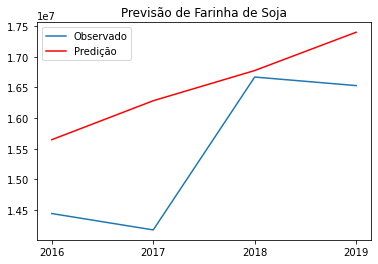

In [157]:
ols_fc_soybean_meal = ols_result_soybean_meal.predict(y_tons_validação[soybean_meal_features])

plt.plot(y_tons_validação[interest_soybean_meal])
plt.plot(ols_fc_soybean_meal, color='red')
plt.legend(['Observado','Predição'])

plt.title("Previsão de Farinha de Soja")
plt.show()

###3. Para a **Soja**

In [128]:
# SOJA

ols_model_soybeans= sm.OLS(df_ex_treino[interest_soybeans], df_ex_treino[soybeans_features])
ols_result_soybeans = ols_model_soybeans.fit()
print(ols_result_soybeans.summary())

                                 OLS Regression Results                                
Dep. Variable:               soybeans   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              761.1
Date:                Sun, 20 Dec 2020   Prob (F-statistic):                    1.57e-16
Time:                        15:05:45   Log-Likelihood:                         -299.13
No. Observations:                  19   AIC:                                      608.3
Df Residuals:                      14   BIC:                                      613.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

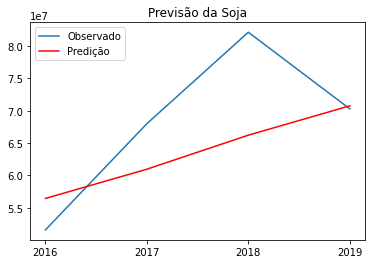

In [158]:
# SOJA
ols_fc_soybeans = ols_result_soybeans.predict(y_tons_validação[soybeans_features])

plt.plot(y_tons_validação[interest_soybeans])
plt.plot(ols_fc_soybeans, color='red')
plt.legend(['Observado','Predição'])

plt.title("Previsão da Soja")
plt.show()

**Algumas considerações**:

- O ajuste ($ R ^ 2 $  e  $ R ^ 2 $ *ajustado*) observado nos modelos foi superior a 95%.

- As variáveis dependentes selecionadas apresentaram predominância significativa entre os modelos de produtos.

##7° Avaliando a precisão da Máquina Preditiva (*Modelo*)

- Para o nosso caso, serão utilizadas as métricas do **MSPE** e **MAPE** para avaliar e analisar as previsões dos modelos.

In [142]:
def forecast_accuracy(dados_pred, dados_observados, column_names):
        
    result = pd.DataFrame(index=['MSPE','MAPE'], columns=column_names)
    
    result_col = 0
    for column in dados_observados.columns:
        mspe = mean_squared_error(dados_observados[column], dados_pred[column])
        mape = mean_absolute_error(dados_observados[column], dados_pred[column])
        
        result.iloc[0, result_col] = mspe
        result.iloc[1, result_col] = mape
        
        result_col += 1
        
    return result

In [143]:
# Organizando os dados para fazer a previsão

fc_arima_c2 = pd.DataFrame()

fc_arima_c2['corn'] = fc_arima_corn
fc_arima_c2['soybean_meal'] = fc_arima_soybean_meal
fc_arima_c2['soybeans'] = fc_arima_soybeans
fc_arima_c2

,corn,soybean_meal,soybeans
date,,,
2016,3.605143e+07,1.593687e+07,5.780827e+07
2017,3.074720e+07,1.704714e+07,6.543570e+07
2018,3.807097e+07,1.815742e+07,7.008202e+07
2019,4.545188e+07,1.926769e+07,7.699340e+07


In [144]:
# Organizando os dados para fazer a previsão

fc_ols = pd.DataFrame()

fc_ols['corn'] = ols_fc_corn
fc_ols['soybean_meal'] = ols_fc_soybean_meal
fc_ols['soybeans'] = ols_fc_soybeans
fc_ols

,corn,soybean_meal,soybeans
year,,,
2016,2.765818e+07,1.564825e+07,5.644170e+07
2017,3.072258e+07,1.628354e+07,6.096663e+07
2018,3.863020e+07,1.677623e+07,6.622750e+07
2019,4.766981e+07,1.740066e+07,7.076340e+07


In [159]:
# Avaliando a Precisão da previsão com o modelo - ARIMA

fc_acc_arima_c2 = forecast_accuracy(fc_arima_c2, y_tons_validação[['corn','soybean_meal','soybeans']], 
                                    ['Corn_ARIMA','Soybean_meal_ARIMA','Soybeans_ARIMA'])
fc_acc_arima_c2

,Corn_ARIMA,Soybean_meal_ARIMA,Soybeans_ARIMA
MSPE,1.12854e+14,5.04346e+12,5.8963e+13
MAPE,8.65563e+06,2.14706e+06,6.89101e+06


In [160]:
# Avaliando a Precisão da previsão com o modelo - OLS
fc_acc_ols = forecast_accuracy(fc_ols, y_tons_validação[['corn','soybean_meal','soybeans']], 
                               ['Corn_OLS','Soybean_meal_OLS','Soybeans_OLS'])
fc_acc_ols

,Corn_OLS,Soybean_meal_OLS,Soybeans_OLS
MSPE,8.05172e+13,1.6645e+12,8.17291e+13
MAPE,7.24545e+06,1.07195e+06,7.07276e+06


**Algumas considerações**:

- Com base nos resultados de precisão, podemos selecionar um modelo dos 2 modelados por produto.


- Com base nos resultados anterior, pode-se perceber que os melhores modelos testados por produto são:

 - **Milho**: ARIMA (3,2,0)
 - **Farinha de Soja**: OLS (Preço mais os melhores parceiros);
 - **Soja**: OLS (Preço mais os melhores parceiros).

### 1. **Milho**

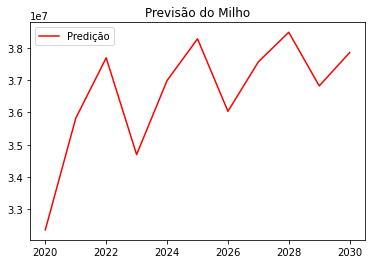

In [162]:
model_corn = sm.tsa.arima.ARIMA(x_tons_treino[interest_corn], order=(3, 1, 0))
model_corn = model_corn.fit()


start_index = '2020'
end_index = '2030'
arima_fc_corn = model_corn.predict(start=start_index, end=end_index)

plt.plot(arima_fc_corn, color='red')
plt.legend(['Predição'])

plt.title("Previsão do Milho")
plt.show()

###2. **Farinha de Soja**

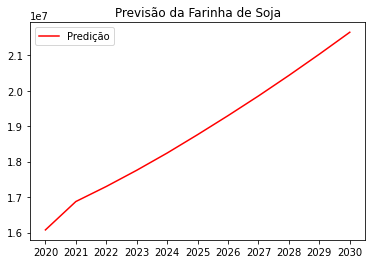

In [165]:
ols_fc_soybean_meal = ols_result_soybean_meal.predict(df_test[soybean_meal_features])


plt.plot(ols_fc_soybean_meal, color='red')
plt.legend(['Predição'])

plt.title("Previsão da Farinha de Soja")
plt.show()

###3. **Soja**

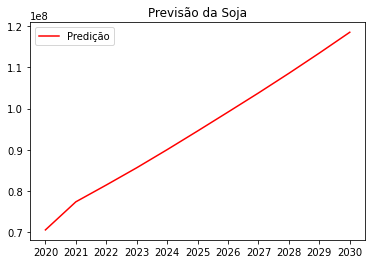

In [166]:
ols_fc_soybeans = ols_result_soybeans.predict(df_test[soybeans_features])


plt.plot(ols_fc_soybeans, color='red')
plt.legend(['Predição'])

plt.title("Previsão da Soja")
plt.show()

**Algumas considerações**:

- Todas as projeções realizadas nos mostram um aumento nas exportações de *Milho*, *Farinha de Soja* e *Soja* (em toneladas) ao longo do tempo. 

- Assim, observa-se que tem-se o indicativo de manutenção da tendência de crescimento das exportações desses produtos até 2030.

In [169]:
# Ciência de Dados é Vida 
%%html
<marquee style='width: 60%; color: DarkRed;'><b>Muito Obrigado!</b></marquee>